In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# file to load
clean_api_data = "./Outputs/Project_Data.csv"

api_data = pd.read_csv(clean_api_data)
api_data

,DBA Name,Street Address,Yelp Name,Price Level,Rating,Review Count,Top Yelp Category,Is Closed,Yelp Address,Zipcode,Neighborhood
0,Sultan's Kebab,3915 24th St,Sultan's Kebab,$$,3.5,92,Mediterranean,False,3915 24th St,94114,NaN
1,Turk & Larkin Deli,476 Turk St,Turk & Larkin Deli,$,4.5,107,Delis,True,476 Turk St,94102,Tenderloin
2,Cha Cha Cha Restaurant,1801 Haight St,Cha Cha Cha,$$,4.0,3212,Caribbean,False,1801 Haight St,94117,Haight Ashbury
3,Daily Health,1235 9th Ave,Daily Health Food Center,$$,4.0,89,Health Markets,True,1235 9th Ave,94122,Inner Sunset
4,Grasslands,905 Kearny St,Grasslands Bar & Lounge,$,3.5,81,Bars,False,905 Kearny St,94133,Chinatown
5,Cheese Steak Shop The,1716 Divisadero St,The Cheese Steak Shop,$$,4.0,912,Sandwiches,False,1716 Divisadero St,94115,Pacific Heights
6,Bills Place,2315 Clement St,Bill's Place,$$,3.5,738,Burgers,False,2315 Clement St,94121,Outer Richmond
7,Eddies Cafe,800 Divisadero St,Eddie's Cafe,$,4.0,626,Breakfast & Brunch,False,800 Divisadero St,94117,Western Addition
8,Jj Ice Cream,1152 Irving St,Let's Roll Ice Creamery,$,4.0,275,Ice Cream & Frozen Yogurt,False,1152 Irving St,94122,Inner Sunset
9,Babys Eatery & Palabok,4609 Mission St,Baby's Eatery and Palabok,$,4.0,86,Filipino,False,4609 Mission St,94112,Excelsior


In [3]:
# calculate how many restaurants there are
total_restaurants = len(api_data["Is Closed"])
# pd.DataFrame({"Total Restaurants":[total_restaurants]})
total_restaurants

2929

In [4]:
# calculate how many restaurants are open vs closed
open_restaurants = (api_data["Is Closed"].value_counts())
open_restaurants



False    2676
True      253
Name: Is Closed, dtype: int64

In [5]:
open_close = (open_restaurants/total_restaurants)
open_close

open_close_summary = pd.DataFrame({"Open Vs. Close": open_restaurants,
                                    "Percentage": open_close})
open_close_summary["Percentage"] = open_close_summary["Percentage"].map("{:,.2%}".format)
open_close_summary


,Open Vs. Close,Percentage
False,2676,91.36%
True,253,8.64%


In [6]:
open_close_percent_calc = (open_restaurants/total_restaurants)
open_close_percent_calc

False    0.913622
True     0.086378
Name: Is Closed, dtype: float64

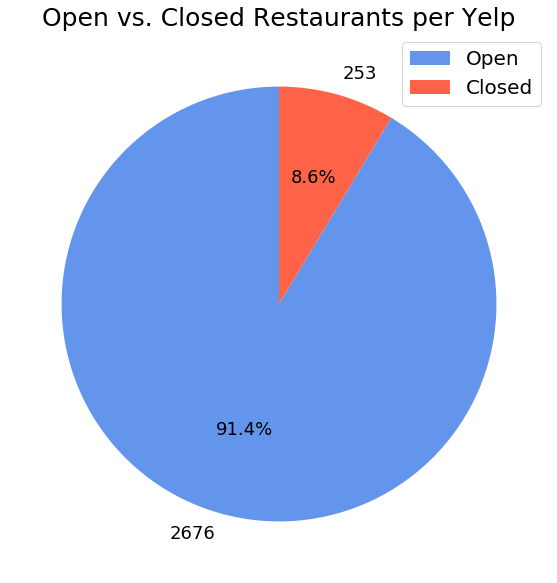

In [13]:
open_close_percent_calc = (open_restaurants/total_restaurants)
open_close_percent_calc
legend = ["Open", "Closed"]
colors = ["cornflowerblue", "tomato"]

plt.figure(figsize=(10,10))

plt.title("Open vs. Closed Restaurants per Yelp", fontsize=25,ha="center")

plt.pie(open_close_percent_calc,  colors=colors,labels = open_restaurants,
        autopct="%1.1f%%", shadow=False, startangle=90,textprops={'fontsize': 18})
# plt.axis(“equal”)
plt.legend(legend, fontsize=20, loc="best")


plt.savefig("./Outputs/Yelp_Open_Closed.png")
plt.show()

Cuisine Calculations

In [14]:
# calculate categories by popularity

cuisines_count = (api_data["Top Yelp Category"].value_counts())
cuisines_count

categories_percentage = (cuisines_count/total_restaurants)
categories_percentage.head()

Coffee & Tea      0.066917
Chinese           0.047456
Mexican           0.043018
Pizza             0.041652
American (New)    0.036190
Name: Top Yelp Category, dtype: float64

In [15]:
cuisine_summary = pd.DataFrame({"# of Restaurants": cuisines_count,
                                "Percentage": categories_percentage})
cuisine_summary["Percentage"] = cuisine_summary["Percentage"].map("{:,.2%}".format)
plot_cuisine_summary = cuisine_summary.head(25)
plot_cuisine_summary

,# of Restaurants,Percentage
Coffee & Tea,196,6.69%
Chinese,139,4.75%
Mexican,126,4.30%
Pizza,122,4.17%
American (New),106,3.62%
Sushi Bars,93,3.18%
Italian,92,3.14%
Sandwiches,85,2.90%
Vietnamese,84,2.87%
Bakeries,80,2.73%


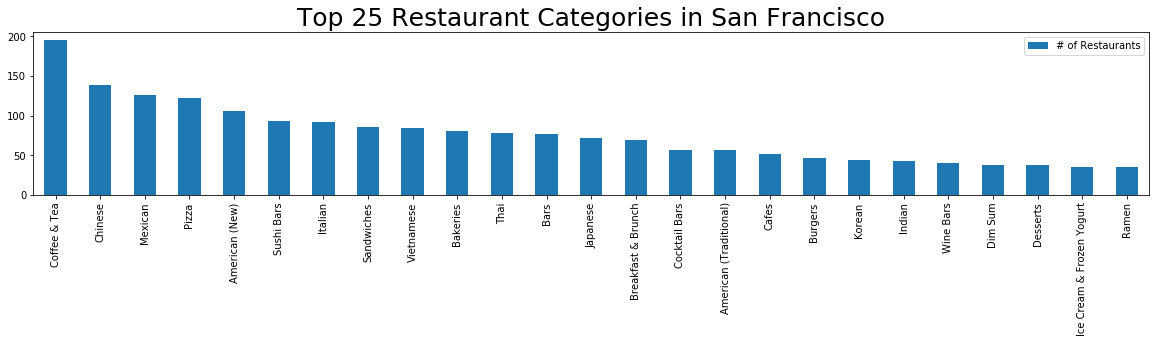

<Figure size 432x288 with 0 Axes>

In [17]:
# bar graph

# # Filter the DataFrame down only to those columns to chart
# #this is extracting
# cuisine_percentage = cuisine_summary[["Top Yelp Category", "Percentage"]]

# # Set the index to be "State" so they will be used as labels
# cuisine = cuisine_percentage.set_index("State")

# state_and_inches.head()

# Use DataFrame.plot() in order to create a bar chart of the data
plot_cuisine_summary.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Top 25 Restaurant Categories in San Francisco", fontsize=25, ha="center")

plt.savefig("./Outputs/Yelp_Top_Categories.png")
plt.show()
plt.tight_layout()


In [18]:
#Data by Top Yelp Category

#calculate columns
cat_count = api_data.groupby(["Top Yelp Category"]).count()["Review Count"]
cat_rating_average = api_data.groupby(["Top Yelp Category"]).mean()["Rating"]
cat_review_total = api_data.groupby(["Top Yelp Category"]).sum()["Review Count"]
cat_review_ave = api_data.groupby(["Top Yelp Category"]).mean()["Review Count"]

#create summary table
category_df = pd.DataFrame({"Restaurant Count": cat_count,
                            "Total Reviews": cat_review_total,
                            "Average Rating": cat_rating_average,
                            "Average Number of Reviews":cat_review_ave
                               })
cat_df = category_df.sort_values("Restaurant Count", ascending=False)

#clean up data
cat_df["Average Rating"] = cat_df["Average Rating"].map("{:,.2f}".format)
cat_df["Average Number of Reviews"] = cat_df["Average Number of Reviews"].map(int)

cat_df = cat_df.reset_index()

#Top 25 Categories in Yelp - Summary Table
cat_df.head(25)

,Top Yelp Category,Restaurant Count,Total Reviews,Average Rating,Average Number of Reviews
0,Coffee & Tea,196,61663,4.03,314
1,Chinese,139,53032,3.52,381
2,Mexican,126,61625,3.80,489
3,Pizza,122,50145,3.60,411
4,American (New),106,69666,3.91,657
5,Sushi Bars,93,45618,3.89,490
6,Italian,92,68609,3.85,745
7,Sandwiches,85,29453,3.94,346
8,Vietnamese,84,37905,3.76,451
9,Bakeries,80,47328,3.96,591


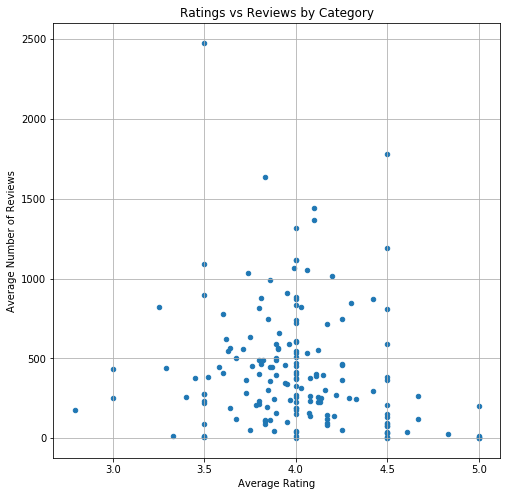

In [20]:
cat_df['Average Rating']=pd.to_numeric(cat_df['Average Rating'])

cat_df.plot(kind = "scatter", x = "Average Rating", y = "Average Number of Reviews", grid=True, figsize=(8,8),
             title="Ratings vs Reviews by Category")

plt.savefig("./Outputs/Yelp_Ratings_vs_Reviews_Categories.png")
plt.show()

In [21]:
# calculate price level

#replace $ signs with countable values
api_data['Price Level'] = api_data['Price Level'].replace(
                        {'$': '1 Dollar', '$$': '2 Dollars',
                         '$$$': '3 Dollars','$$$$': '4 Dollars',
                         'No record in Yelp':'N/A'})

price = (api_data["Price Level"].value_counts())
price



2 Dollars    1592
1 Dollar      903
N/A           198
3 Dollars     190
4 Dollars      46
Name: Price Level, dtype: int64

In [22]:
price_percentage = (price/total_restaurants)
price_percentage

2 Dollars    0.543530
1 Dollar     0.308296
N/A          0.067600
3 Dollars    0.064869
4 Dollars    0.015705
Name: Price Level, dtype: float64

In [23]:
price_range_summary = pd.DataFrame({"Price Range": price,
                                "Percentage": price_percentage})
price_range_summary["Percentage"] = price_range_summary["Percentage"].map("{:,.2%}".format)
price_range_summary = price_range_summary.sort_index()

price_range_summary

,Price Range,Percentage
1 Dollar,903,30.83%
2 Dollars,1592,54.35%
3 Dollars,190,6.49%
4 Dollars,46,1.57%
N/A,198,6.76%


In [24]:
#create table from where we can grab the values
price_vals = api_data["Price Level"].value_counts()

#name the variables
one_dollar = price_vals['1 Dollar']
two_dollar = price_vals['2 Dollars']
three_dollar = price_vals['3 Dollars']
four_dollar = price_vals['4 Dollars']
na_price = price_vals['N/A']

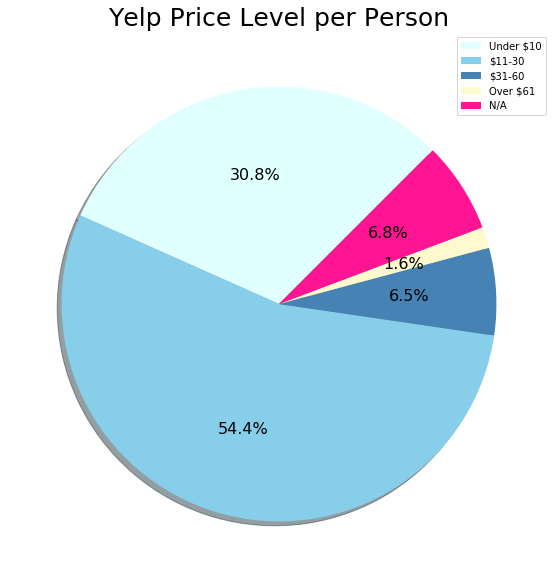

In [26]:
price_range = ["Under $10", "$11-30", "$31-60", "Over $61", "N/A"]
members = [one_dollar,two_dollar,three_dollar,four_dollar,na_price]
colors = ["lightcyan", "skyblue", "steelblue", "lemonchiffon", "deeppink"]
plt.figure(figsize=(10,10))
plt.title("Yelp Price Level per Person", fontsize=25, ha="center")
plt.pie(members, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45,textprops={'fontsize': 16})
# plt.axis("equal")
plt.legend(price_range, loc="best")
plt.savefig("./Outputs/Yelp_Price_Pie.png")
plt.show()

In [27]:
#Zip Code - looking at relationship between location and restaurant data

grouped_data = api_data.groupby(['Zipcode', 'Neighborhood'])

grouped_data.count()

DBA Name  Street Address  Yelp Name  \
Zipcode Neighborhood                                                          
94102   Financial District/South Beach         2               2          2   
        Hayes Valley                          41              41         41   
        Nob Hill                               6               6          6   
        South of Market                        1               1          1   
        Tenderloin                            71              71         71   
        Western Addition                       1               1          1   
94103   Financial District/South Beach         8               8          8   
        Mission                               54              54         54   
        Mission Bay                            4               4          4   
        Potrero Hill                           1               1          1   
        South of Market                       35              35         35   
94104   Financial District/South Beach        20              20         20   
        Hayes Valley                           1               1          1   
94105   Financial District/South Beach        52              52         52   
94107   Financial District/South Beach        19              19         19   
        Mission Bay                            1               1          1   
        Potrero Hill                          21              21         21   
        South of Market                       19              19         19   
94108   Chinatown                             22              22         22   
        Financial District/South Beach        26              26         26   
        Nob Hill                              12              12         12   
        North Beach                            2               2          2   
94109   Chinatown                              1               1          1   
        Marina                                 4               4          4   
        Nob Hill                              49              49         49   
        Russian Hill                          34              34         34   
        Tenderloin                            39              39         39   
        Western Addition                       9               9          9   
94110   Bernal Heights                        45              45         45   
        Mission                              164             164        164   
...                                          ...             ...        ...   
94117   Hayes Valley                          30              30         30   
        Inner Sunset                           2               2          2   
        Lone Mountain/USF                      4               4          4   
        Western Addition                       6               6          6   
94118   Inner Richmond                        53              53         53   
        Lone Mountain/USF                      9               9          9   
        Outer Richmond                        13              13         13   
        Presidio Heights                      12              12         12   
94121   Golden Gate Park                       2               2          2   
        Outer Richmond                        71              71         71   
94122   Inner Sunset                          39              39         39   
        Sunset/Parkside                       55              55         55   
94123   Marina                                64              64         64   
94124   Bayview Hunters Point                 33              33         33   
94127   West of Twin Peaks                    15              15         15   
94129   Presidio                               1               1          1   
94131   Glen Park                             12              12         12   
        Noe Valley                             5               5          5   
        Wes

In [28]:
#top zip codes with restaurants

#calculate columns
resto_count = api_data.groupby(["Zipcode"]).count()["Review Count"]
rating_average = api_data.groupby(["Zipcode"]).mean()["Rating"]
review_total = api_data.groupby(["Zipcode"]).sum()["Review Count"]
closed = api_data.groupby(["Zipcode"]).sum()["Is Closed"]
open_resto = resto_count - closed

#create summary table
resto_count_zip = pd.DataFrame({"Restaurant Count": resto_count, 
                            "Average Rating": rating_average,
                            "Total Reviews": review_total,
                            "Open Restaurants": open_resto,
                            "Closed Restaurants": closed                            
                               })

#sort by top zip code
top_zip_df = resto_count_zip.sort_values("Restaurant Count", ascending=False)

#clean up data
top_zip_df["Average Rating"] = top_zip_df["Average Rating"].map("{:,.2f}".format)
top_zip_df["Open Restaurants"] = top_zip_df["Open Restaurants"].map(int)
top_zip_df["Closed Restaurants"] = top_zip_df["Closed Restaurants"].map(int)

top_zip_df = top_zip_df.reset_index()

In [29]:
top_zip_df

,Zipcode,Restaurant Count,Average Rating,Total Reviews,Open Restaurants,Closed Restaurants
0,94110,385,3.99,188615,342,43
1,94109,244,3.96,113799,227,17
2,94102,228,3.91,141269,213,15
3,94103,190,3.91,96742,176,14
4,94122,175,3.86,88880,153,22
5,94118,157,3.88,70307,143,14
6,94117,145,3.91,76677,132,13
7,94133,141,3.94,84559,129,12
8,94121,130,3.87,63561,120,10
9,94114,127,3.85,56033,114,13


In [30]:
#chart open and closed restaurants per zip code

# Filter the DataFrame down only to those columns to chart
open_closed = top_zip_df[["Zipcode","Open Restaurants","Closed Restaurants"]]

# Set the index to be Zipcode
open_closed = open_closed.set_index("Zipcode")

#only take top 20 zipcodes
top_open_closed = open_closed.head(20)

top_open_closed

,Open Restaurants,Closed Restaurants
Zipcode,,
94110,342,43
94109,227,17
94102,213,15
94103,176,14
94122,153,22
94118,143,14
94117,132,13
94133,129,12
94121,120,10


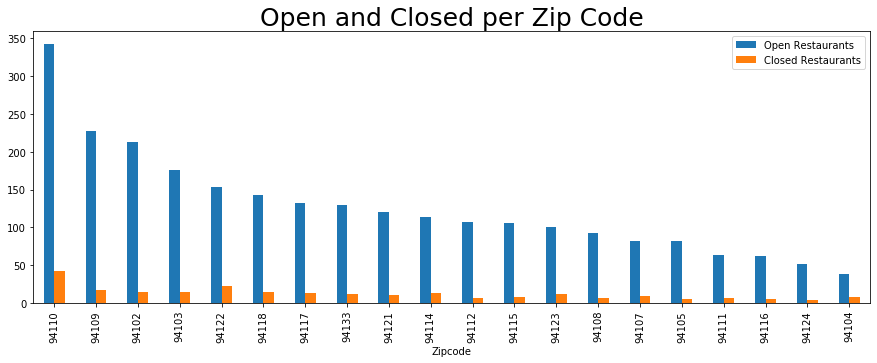

In [32]:
# Use DataFrame.plot() in order to create a bar chart of the data
top_open_closed.plot(kind="bar", figsize=(15,5))

# Set a title for the chart
plt.title("Open and Closed per Zip Code", fontsize=25, ha="center")

plt.savefig("./Outputs/Yelp_Open_Closed_Zip.png")
plt.show()

In [33]:
#Review count

review_df = api_data.loc[:,["DBA Name", "Review Count", "Rating"]]
review_df.head()
# review_df.columns

review_df = review_df.set_index(['DBA Name'])
review_df

,Review Count,Rating
DBA Name,,
Sultan's Kebab,92,3.5
Turk & Larkin Deli,107,4.5
Cha Cha Cha Restaurant,3212,4.0
Daily Health,89,4.0
Grasslands,81,3.5
Cheese Steak Shop The,912,4.0
Bills Place,738,3.5
Eddies Cafe,626,4.0
Jj Ice Cream,275,4.0


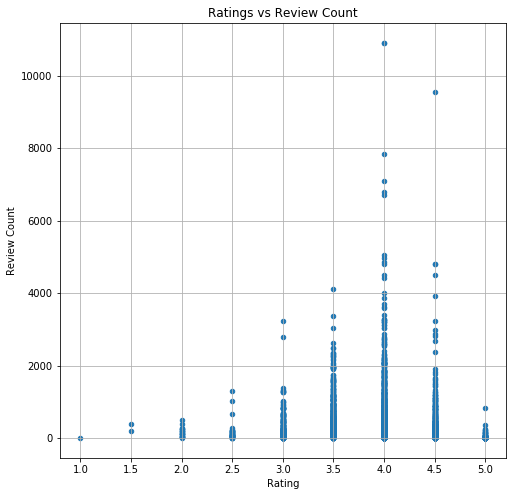

In [35]:
review_df.plot(kind = "scatter", x = "Rating", y = "Review Count", grid=True, figsize=(8,8),
             title="Ratings vs Review Count")
plt.savefig("./Outputs/Yelp_All_Rating_vs_Review.png")
plt.show()

In [36]:
# calculate Review Count (popularity)

# Establish bins for review count
bins_for_reviews = [0, 49.9, 99.9, 199.9, 499.9, 999.9, 1999.9, 2999.9, 99999]

# * Categorize the numbers reviews using the age bins. Hint: use pd.cut()
bin_names = ["0 - 50 Reviews ", "51 - 100 Reviews ", "101 - 200 Reviews", 
             "201 - 500 Reviews", "501 - 1000 Reviews", "1001 - 2000 Reviews", "2001 - 3000 Reviews", 
             "3000+ Reviews"]

# * Calculate the numbers and percentages by age group
review_df["Popularity by Review"] = pd.cut(review_df["Review Count"], bins_for_reviews, labels=bin_names)
review_df

review_count = review_df["Popularity by Review"].value_counts()
percentage_count = review_count/total_restaurants

reviews_df = pd.DataFrame({"Restaurants": review_count, "Percentage of Total Reviews": percentage_count})
reviews_df["Percentage of Total Reviews"] = reviews_df["Percentage of Total Reviews"].map("{:,.2%}".format)
reviews_df = reviews_df.sort_index()

reviews_df
 


,Restaurants,Percentage of Total Reviews
0 - 50 Reviews,420,14.34%
51 - 100 Reviews,346,11.81%
101 - 200 Reviews,504,17.21%
201 - 500 Reviews,815,27.83%
501 - 1000 Reviews,476,16.25%
1001 - 2000 Reviews,264,9.01%
2001 - 3000 Reviews,65,2.22%
3000+ Reviews,39,1.33%
